# Задание 5

Реализуйте генератор случайных квадратичных функций $n$ переменных с числом обусловленности $k$.

## Инициализация

### Импорт библиотек

In [1]:
# Для анимаций
from matplotlib import rc
rc('animation', html='jshtml')
from matplotlib.animation import FuncAnimation

# Для больших анимаций
import matplotlib as mpl
mpl.rcParams['animation.embed_limit'] = 1000.0 

# Для графиков и прочего
import numpy as np
import scipy
from matplotlib import cm
import matplotlib.pyplot as plt
import math
import pandas as pd

# Для корректного отображения 
%matplotlib inline
plt.style.use('fivethirtyeight')

# Для таблиц
import csv 

# Для работы с файлами
import os

# Для progress bar
from tqdm import tqdm

### Отрисовка пространства

In [2]:
def init():
    global X, Y, Z, f, x0
    Z = np.vectorize(lambda x, y: f(np.array([x, y])))(X, Y)

### 3D визуализация функции

In [17]:
def print_f(elev = 30, azim = 60, filename='', filename_extension='.png', dpi=1024):
  plt.figure(figsize=(10, 10))
  ax = plt.subplot(111, projection='3d')
  ax.view_init(elev=35, azim=45)

  ax.plot_surface(X, Y, Z)
  plt.plot(x0[0], x0[1], f(x0), 'ro', label='Начальная точка')
  ax.view_init(elev=elev, azim=azim)
  plt.legend(loc='upper left')

  if (filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()

def print_full_grad(list_result, list_label, title='Градиентный спуск на графике функции', elev = 30, azim = 80, filename='', filename_extension='.png', dpi=1024, isshow=True):
  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(projection='3d')

  for i in range(len(list_result)):
    x = list_result[i][:, 0]
    y = list_result[i][:, 1]
    z = np.vectorize(lambda x, y: f(np.array([x, y])))(x, y)
    ax.plot(x, y, marker='.', markersize=10, markerfacecolor='black', zs=z, label=list_label[i], linewidth = 2)
    print(f'{list_label[i]:15} ==> {f(list_result[i][-1]):10f} in [{list_result[i][-1][0]:10f}, {list_result[i][-1][1]:10f}]')
    
  ax.plot_surface(X, Y, Z, cmap=cm.coolwarm)
  ax.view_init(elev=elev, azim=azim)
  
  # Установка отступа между графиком и значениями осей
  ax.tick_params(pad=10)

  # Добавление легенды
  if len(list_label) > 0:
    ax.legend(loc='upper left')

  # Установка размера шрифта для подписей осей
  ax.tick_params(axis='x', labelsize=10)
  ax.tick_params(axis='y', labelsize=10)
  ax.tick_params(axis='z', labelsize=10)

  # Добавление заголовка и подписей осей
  if title != '':
    plt.title(title)
  
  ax.set_xlabel('Ось X', labelpad=20.0)
  ax.set_ylabel('Ось Y', labelpad=20.0)
  ax.set_zlabel('Ось f(x, y)', labelpad=20.0)


  if(filename != ''):
    plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

  plt.show()

### Функция проверки правильности сгенерированной матрицы

In [4]:
# Функция проверки числа обусловленности у сгенерированных матриц 
def check_generate_matrix(f_generator, g = 900):
    n = 2       # Размерность сгенерированной матрицы
    k = 1000    # Необходимое число обусловленности сгенерированной матрицы

    #g          # Число испытаний
    eps = 1e-3  # Допустимая погрешность в числе обусловленности

    x = np.arange(0, g, 1)
    y = np.zeros(g)

    number_of_wrong = 0
    for i in tqdm(range(g)):
        y[i] = np.linalg.cond(f_generator(n, k, eps=eps))
        if(np.abs(y[i] - k) > eps):
            number_of_wrong += 1

    print("Количество неправильных матриц:", number_of_wrong)
    # print(y)

    plt.plot(x, y)
    plt.show()

## Решение задания

### Инициализация констант

#### Технические константы

In [5]:
PATH_IMAGE = 'Image' + os.sep
PATH_HQ = 'HQ' + os.sep
PATH_DATA = 'Data' + os.sep
CNST_DPI_IMAGE = 256
CNST_DPI_HQ = 1024

#### Константы задания

In [6]:
FILE_PREFIX = 'T5_'

### Первый способ генерации (с сохранением коэффициентов при квадратах)

#### Описание метода

Простой способ, сохраняет только коэффициенты при $x_i^2$ (на главной диагонали).

Этот способ генерирует диагональную матрицу, такую, что частное максимального и минимального элемента равно $k$. Пусть $A$ - матрица и $a^i_j$ - элемент в ячейке $\langle i, ~ j \rangle$, тогда

$$
    \dfrac{\max_{\forall~i}(a^i_i)}{\min_{\forall~i}(a^i_i)} = k
$$

Так как матрица диагональная - собственные числа такой матрицы равны элементам на диагонали, сингулярные числа совпадают с собственными, а отношение максимального сингулярного числа к минимальному - один из способов вычислить число обусловленности матрицы: 2-norm (largest sing. value).

#### Генерация диагональной матрицы размера $n$ и числом обусловленности $k$

In [7]:
def generate_random_matrix_simple(n, k, eps):
    # eps -- неиспользуемое значение, необходимо для соответствия другим функциям генераторам
    A = np.zeros((n, n))
    A[0,0] = np.random.uniform(low=-1, high=1)
    A[n-1, n-1] = A[0,0] / k

    for i in range(0, n-2):
        A[i, i] = np.random.uniform(low=A[0,0], high=A[n-1, n-1])

    return A

# облегченная версия generate_random_matrix_simple
def generate_random_vector_simple(n, k):
    global v
    v = np.zeros((n))
    v[0] = np.random.uniform(low=-1, high=1)
    v[n-1] = v[0] / k

    for i in range(0, n-2):
        v[i] = np.random.uniform(low=v[0], high=v[n-1])

    return v

#### Генерация квадратичной функции

In [8]:
def generate_quadratic_function_simple(n, k):
    # Генерируем случайную матрицу размера n x n, и числом обусловленности k
    v = generate_random_vector_simple(n, k)

    # Определяем квадратичную функцию f(x) = x * A * x^T
    def f(x):
        return sum([v[i]*(x[i]**2) for i in range(len(v))])
    
    return f

#### Вывод квадратичной функции

In [9]:
def get_str_equation_quadratic_function_simple():
    global v
    # Создаем список из строк для каждого члена квадратичной функции
    return [f'{v[i]}*x[{i}]**2' for i in range(len(v))]

def get_code_quadratic_function_simple():
    # Создаем список из строк для каждого члена квадратичной функции
    members = get_str_equation_quadratic_function_simple()

    # Объединяем строки с помощью символа '+'
    function_str = ' + '.join(members)

    # Создаем строку, содержащую полный код функции
    function_code = f'def f(x):\n\treturn {function_str}'

    return function_code

### Второй способ генерации (прогрессивный метод, сохраняет все коэффициенты квадратичного уравнения)

#### Функция поиска такого $x$, что $f(x) = m$

In [10]:
def find_x(f, m, x1 = 0, x2 = 1):
    """
        Функция вычисления неизвестной x, такой, что f(x) = m

        Аргументы:
        f -- функция
        m -- необходимое значение
        x1, x2 -- точки, с которых начинаем поиск

        Возвращает:
        x -- неизвестная
    """
    # Используем метод бисекции для нахождения x
    eps = 1e-6
    while f(x2) < m:
        x1, x2 = x2, x2 * 2
    # Применяем метод бисекции
    while abs(x2 - x1) > eps:
        mid = (x1 + x2) / 2
        if f(mid) < m:
            x1 = mid
        else:
            x2 = mid
    return x2

#### Генерация случайной матрицы размера $n$ и числом обусловленности $k$

In [11]:
# def generate_random_matrix_progressive(n, k, eps=1e-3):
#     # генерируем случайную матрицу размера n, и значениями в отрезке [-1, 1]
#     A = np.random.uniform(low=-1, high=1, size=(n, n))

#     for i in range(n):
#         for j in range(n):
#             # задаем позицию рассматриваемого элемента матрицы
#             pos = i, j

#             # задаем функцию возвращающую число обусловленности матрицы в зависимости от элемента матрицы
#             def f(x):
#                 A[pos] = x
#                 return np.linalg.cond(A)

#             buf = A[pos]
#             # ищем подходящий первый элемент матрицы
#             A[pos] = find_x(f, k)

#             # если не нашли, пробуем значения меньше нуля 
#             if np.abs(np.linalg.cond(A) - k) > eps:
#                 A[pos] = find_x(f, k, x2=-1)
#             else:
#                 return A
            
#             A[pos] = buf


#     # если и так не нашли, генерируем новую матрицу 
#     if(np.abs(np.linalg.cond(A) - k) > 1e-3):
#         return generate_random_matrix_progressive(n, k)

#     return A

#### Генерация квадратичной функции

In [12]:
# def generate_quadratic_function_progressive(n, k):
#     # Генерируем случайную матрицу размера n x n, и числом обусловленности k
    
#     global A
#     A = generate_random_matrix_progressive(n, k)

#     # Определяем квадратичную функцию f(x) = x * A * x^T
#     def f(x):
#         return (x.dot(A)).dot(x.T) 
    
#     return f

#### Вывод квадратичной функции

In [13]:
# def get_str_equation_quadratic_function_progressive():
#     global A
#     # Формируем строку, соответствующую уравнению квадратичной функции
#     x_str = ['x[' + str(i) + ']' for i in range(A.shape[0])]
#     terms = []
#     for i in range(A.shape[0]):
#         for j in range(A.shape[1]):
#             term = str(A[i][j]) + '*' + x_str[i] + '*' + x_str[j]
#             terms.append(term)
#     return ' + '.join(terms)      

# def get_code_line_wiev_quadratic_function_progressive():
#     return 'def f(x):\n\treturn ' + get_str_equation_quadratic_function_progressive()

# def get_code_quadratic_function_progressive():
#     global A
#     # Преобразуем матрицу в список строк и добавляем символ переноса строки после каждой строки
#     # A_str = '[' + ',\n '.join(['[' + ', '.join([str(e) for e in row]) + ']' for row in A]) + ']'
#     A_str = str(A.tolist())
#     function_code = 'def quadratic_function(x):\n'
#     function_code += f'\tA = np.array({A_str})\n'
#     function_code += '\treturn (x.dot(A)).dot(x.T)'
#     return function_code

# 6. Зависимость числа итераций $T(n,k)$, необходимых градиентному спуску для сходимости в зависимости от размерности пространства $2 \leqslant n \leqslant 10^3$ и числа обусловленности оптимизируемой функции $1 \leqslant k \leqslant 10^3$

In [19]:
def gradient_descent_constant_with_end_condition(f, x0, lr, eps, max_iter, minimum):
    x = np.copy(x0)
    steps = 0

    for i in range(max_iter):      
        if abs(f(x) - minimum) < eps:
            break

        steps += 1
        grad_res = grad(f, x)
        x = x - lr * grad_res

    return steps

delta = 1e-9
def grad(f, x):
    """
    Функция вычисления градиента в заданной точке с константной точностью

    Аргументы:
    f -- функция
    x -- точка

    Возвращает:
    ans -- градиент функции в точке x
    """

    n = len(x)
    xd = np.copy(x)
    ans = np.zeros(n)

    for i in range(n):
        xd[i] += delta
        ans[i] = np.divide(f(xd) - f(x), delta)
        xd[i] -= delta

    return ans

def dichotomy_search(f, a, b, eps=1e-6):
    """
    Метод дихотомии для поиска минимума функции f на интервале [a,b] с точностью eps

    Аргументы:
    f -- функция
    a -- начальная точка интервала
    b -- конечная точка интервала
    eps -- точность поиска

    Возвращает:
    x -- точка минимума функции
    """
    while b - a > eps:
        c = (a + b) / 2
        if f(c - eps) < f(c + eps):
            b = c
        else:
            a = c
    return (a + b) / 2

In [15]:
FILE_PREFIX = 'T6_'

In [18]:
num_iterations = 100

def T(n, k):
    f = generate_quadratic_function_simple(int(n), int(k))
    x0 = np.random.uniform(size=(int(n)))

    sum = 0
    for i in range(10):
        sum += gradient_descent_constant_with_end_condition(f, x0, 0.5, 1e-3, max_iter=num_iterations, minimum=0)

    return sum/10

x = np.linspace(2, 1000, 10)
y = np.linspace(1, 1000, 10)
X, Y = np.meshgrid(x, y)

Z = np.vectorize(T)(X, Y)

KeyboardInterrupt: 

In [ ]:
def T(n, k, num_research=10, eps=1e-3):
    sum = 0
    num_iterations = 1000
    for i in range(num_research):
        f = generate_quadratic_function_simple(int(n), int(k))
        x0 = np.random.uniform(low=-sys.maxsize/2**48, high=sys.maxsize/2**48, size=(int(n)))
        sum += gradient_descent_constant_with_end_condition(x0, 0.5, eps, max_iter=num_iterations, minimum=0)

    return sum/num_research

def constant_research_custom_function_k (eps=1e-3, filename='', filename_extension='.png', dpi=1024):
    k_values = np.arange(1, 1001, 1)

    table = {'constant': []}
    
    for cur_k in tqdm(k_values):
        table['constant'].append(T(2, cur_k, eps=eps))


    min_constant_f_count_index = np.argmin(table['constant'])

    plt.xlabel('k', fontsize=14)
    plt.ylabel('step count', fontsize=14)
    plt.plot(k_values, table['constant'], label='constant: min - ' + str(table['constant'][min_constant_f_count_index]) + ' in ' + '%g' % k_values[min_constant_f_count_index], linewidth=0.9)
    plt.legend(loc='upper left')

    if(filename != ''):
        plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

    plt.show()

# print_full_grad([], [], title='', elev=30, azim=-14, )
constant_research_custom_function_k(filename=PATH_HQ + FILE_PREFIX + 'constant_research_custom_function_k', dpi=CNST_DPI_HQ)  

100%|██████████| 200/200 [07:45<00:00,  2.33s/it]


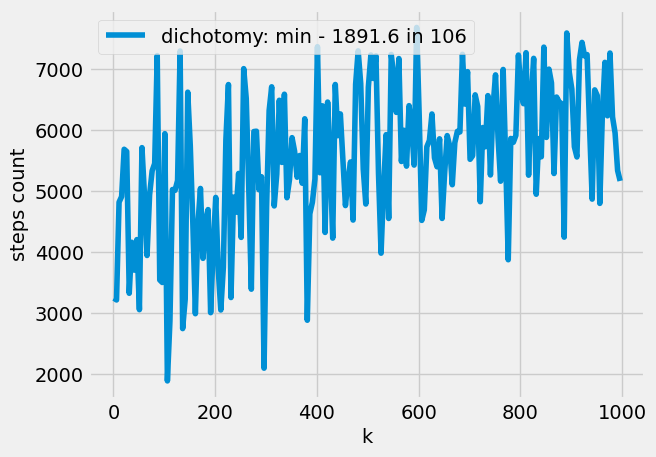

In [23]:
def gradient_descent_dichotomy_with_end_condition(f, x0, max_iter, minimum, step_size=0.01, eps=1e-6):
    x = np.copy(x0)
    steps = 0

    def line_search(x, d):
        fd = lambda alpha: f(x - alpha*d)
        alpha = dichotomy_search(fd, 0, 1, eps)
        return alpha

    for i in range(max_iter):      
        if abs(f(x) - minimum) < eps:
            break
    
        grad_x = grad(f, x)
        x = x - grad_x * line_search(x, grad_x) * step_size
        steps += 1

    return steps

def T(n, k, num_research=10, eps=1e-4):
    sum = 0
    num_iterations = 8000
    for _ in range(num_research):
        f = generate_quadratic_function_simple(int(n), int(k))
        x0 = np.random.uniform(low=-(2 ** 8), high=(2 ** 8), size=(int(n)))
        sum += gradient_descent_dichotomy_with_end_condition(f, x0, num_iterations, 0, step_size=1, eps=eps)

    return sum / num_research

def dichotomy_research_custom_function_k(eps=1e-3, filename='', filename_extension='.png', dpi=1024):
    k_values = np.arange(1, 1001, 5)

    table = {'dichotomy': []}
    
    for cur_k in tqdm(k_values):
        table['dichotomy'].append(T(2, cur_k, eps=eps))


    min_constant_f_count_index = np.argmin(table['dichotomy'])

    plt.xlabel('k', fontsize=14)
    plt.ylabel('steps count', fontsize=14)
    plt.plot(k_values, table['dichotomy'], label='dichotomy: min - ' + str(table['dichotomy'][min_constant_f_count_index]) + ' in ' + '%g' % k_values[min_constant_f_count_index])
    plt.legend(loc='upper left')

    if(filename != ''):
        plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

    plt.show()


dichotomy_research_custom_function_k(filename=PATH_HQ + FILE_PREFIX + 'constant_research_custom_function_k', dpi=CNST_DPI_HQ)  

In [26]:
def dichotomy_research_custom_function_n(eps=1e-3, filename='', filename_extension='.png', dpi=1024):
    k_values = np.arange(2, 1001, 50)

    table = {'dichotomy': []}
    
    for cur_n in tqdm(k_values):
        table['dichotomy'].append(T(cur_n, 3, eps=eps))

    min_constant_f_count_index = np.argmin(table['dichotomy'])

    plt.xlabel('n', fontsize=14)
    plt.ylabel('steps count', fontsize=14)
    plt.plot(k_values, table['dichotomy'], label='dichotomy: min - ' + str(table['dichotomy'][min_constant_f_count_index]) + ' in ' + '%g' % k_values[min_constant_f_count_index])
    plt.legend(loc='upper left')

    if(filename != ''):
        plt.savefig(filename + filename_extension, dpi=dpi, bbox_inches=0, transparent=True)

    plt.show()

dichotomy_research_custom_function_n(filename=PATH_HQ + FILE_PREFIX + 'constant_research_custom_function_n', dpi=CNST_DPI_HQ)  

 70%|███████   | 14/20 [11:16:41<4:50:00, 2900.09s/it]


KeyboardInterrupt: 